<a href="https://colab.research.google.com/github/AsadillahRamadhan/PCVK/blob/main/Pertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
import math

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


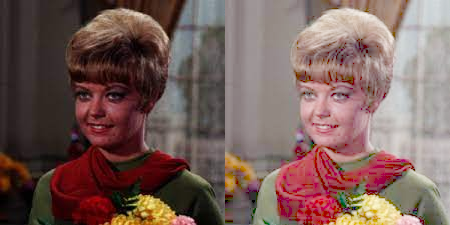

In [8]:
# 1

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan3/female.jpeg')
gamma_correction = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_correction[y,x,c] = np.clip(255 * (pow((original[y,x,c] / 255),(1 / gamma))), 0, 255)

final_frame = cv.hconcat((original, gamma_correction))
cv2_imshow(final_frame)

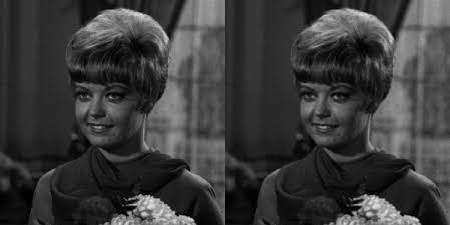

In [30]:
# 2
bit_depth = 8
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan3/female.jpeg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

In [152]:
# 3
cv_img = []
jumlah = [5, 30, 60, 80, 100]
for img in glob.glob('/content/drive/MyDrive/noises/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)

import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr


In [153]:
# 3 (PSNR)
print('PSNR')
print('------------------------------')
try:
  jumlah = int(input('Masukan Jumlah Citra: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img, jumlah)
print('Nilai PSNR: ')
print(result)


PSNR
------------------------------
Masukan Jumlah Citra: 30
Nilai PSNR: 
30.18957972257546


Masukkan Jumlah Citra: 100


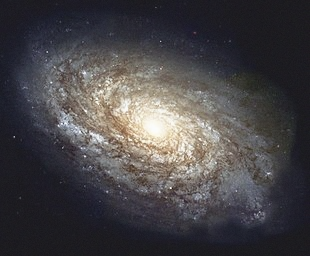

In [149]:
# 3 (Denoising)

try:
 jumlah = int(input('Masukkan Jumlah Citra: '))
except ValueError:
 print('Error, not a number')

average_denoised_image = np.zeros_like(cv_img[0], dtype=np.float64)

for i in range(jumlah):
    img = img.astype(np.float64)
    average_denoised_image += cv_img[i]

average_denoised_image /= (jumlah)
average_denoised_image = average_denoised_image.astype(np.uint8)

cv.imwrite('average_denoised_image.jpg', average_denoised_image)
cv2_imshow(average_denoised_image)

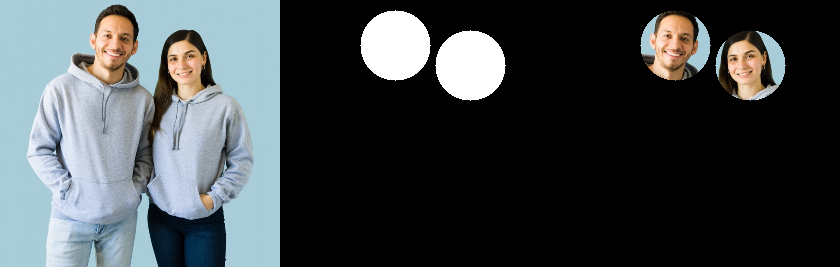

In [117]:
# 4
couple = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan5/couple.jpg')
couple = cv.resize(couple, (0,0), fx=0.4, fy=0.4)
area = np.zeros(couple.shape, couple.dtype)
masking = np.zeros(couple.shape, couple.dtype)
area = cv.circle(area, (115,45), 35, (255,255,255), -1)
area = cv.circle(area, (190,65), 35, (255,255,255), -1)

masking = couple & area

final_frame = cv.hconcat((couple, area, masking))
cv2_imshow(final_frame)

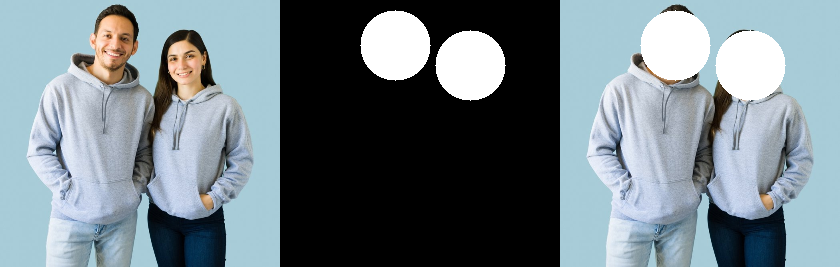

In [118]:
# 5 (OR)
couple = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan5/couple.jpg')
couple = cv.resize(couple, (0,0), fx=0.4, fy=0.4)
area = np.zeros(couple.shape, couple.dtype)
masking = np.zeros(couple.shape, couple.dtype)
area = cv.circle(area, (115,45), 35, (255,255,255), -1)
area = cv.circle(area, (190,65), 35, (255,255,255), -1)

masking = couple | area

final_frame = cv.hconcat((couple, area, masking))
cv2_imshow(final_frame)

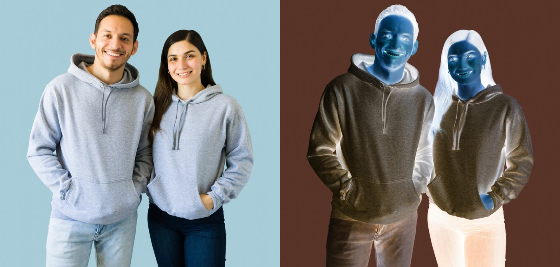

In [129]:
# 5 (NOT)
couple = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan5/couple.jpg')
couple = cv.resize(couple, (0,0), fx=0.4, fy=0.4)
masking = np.zeros(couple.shape, couple.dtype)

masking = cv.bitwise_not(couple)

final_frame = cv.hconcat((couple, masking))
cv2_imshow(final_frame)

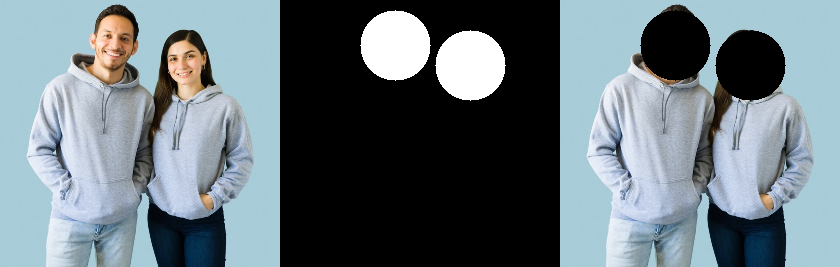

In [134]:
# 5 (NAND)
couple = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan5/couple.jpg')
couple = cv.resize(couple, (0,0), fx=0.4, fy=0.4)
area = np.zeros(couple.shape, couple.dtype)
masking = np.zeros(couple.shape, couple.dtype)
area = cv.circle(area, (115,45), 35, (255,255,255), -1)
area = cv.circle(area, (190,65), 35, (255,255,255), -1)

area_1 = cv.bitwise_not(area)
masking = cv.bitwise_and(couple, area_1)

final_frame = cv.hconcat((couple, area, masking))
cv2_imshow(final_frame)

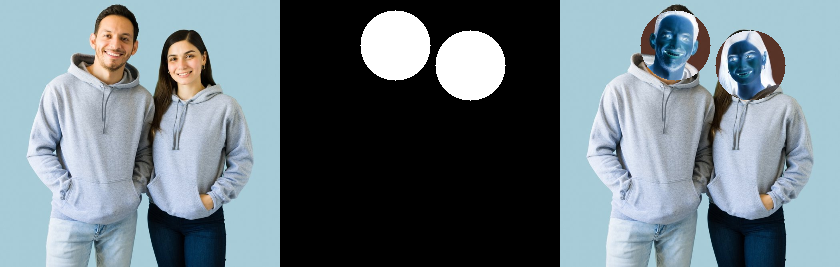

In [125]:
# 5 (XOR)
couple = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan5/couple.jpg')
couple = cv.resize(couple, (0,0), fx=0.4, fy=0.4)
area = np.zeros(couple.shape, couple.dtype)
masking = np.zeros(couple.shape, couple.dtype)
area = cv.circle(area, (115,45), 35, (255,255,255), -1)
area = cv.circle(area, (190,65), 35, (255,255,255), -1)

masking = np.bitwise_xor(couple, area)

final_frame = cv.hconcat((couple, area, masking))
cv2_imshow(final_frame)